# Free flow speeds

Plot the free-flow speeds we'll be using for demand estimation.

In [1]:
using DataFrames, CSV, Plots

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1423
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1423
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


In [3]:
ffs = CSV.read("../data/free_flow_speeds.csv", DataFrame)

,id,lanes,count,median,pct75,pct95
,Int64,Int64,Int64,Float64,Float64,Float64
1,817125,2,0,0.0,0.0,0.0
2,764754,6,3562,73.344,75.1872,77.952
3,1041310,1,0,0.0,0.0,0.0
4,1218847,2,0,0.0,0.0,0.0
5,768646,2,0,0.0,0.0,0.0
6,716720,6,2981,69.776,70.736,72.656
7,763621,4,4564,67.9936,68.8128,70.4512
8,501010084,1,0,0.0,0.0,0.0
9,1086710,2,0,0.0,0.0,0.0


In [5]:
# drop sensors that were not included in the files we looked at (I think these are non-mainline sensors)
ffs = ffs[ffs.count .> 0, :];

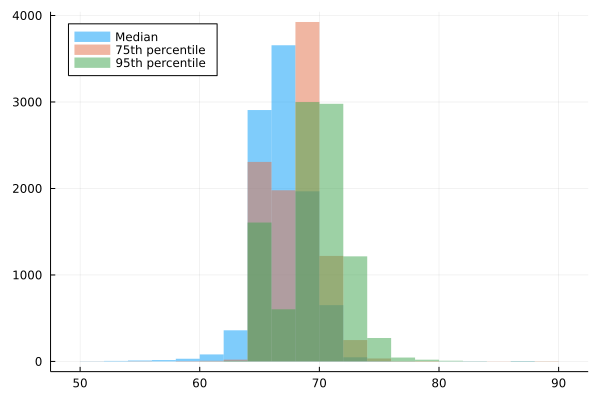

In [21]:
breaks = 50:2:90
histogram(ffs.median, alpha=0.5, label="Median", bins=breaks, stroke=false, legend=:topleft, linewidth=0)
histogram!(ffs.pct75, alpha=0.5, label="75th percentile", bins=breaks, stroke=false, linewidth=0)
histogram!(ffs.pct95, alpha=0.5, label="95th percentile", bins=breaks, stroke=false, linewidth=0)